### I. Importing Libraries

In [1]:
!python3 -m pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### II. Read CSV file and Wrangling Data

In [3]:
gdp_df = pd.read_csv("world_gdp_1960_2020.csv")
gdp_df.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


In [4]:
gdp_df.columns

Index(['year', 'rank', 'country', 'state', 'gdp', 'gdp_percent'], dtype='object')

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         10134 non-null  int64  
 1   rank         10134 non-null  int64  
 2   country      10134 non-null  object 
 3   state        10134 non-null  object 
 4   gdp          10134 non-null  int64  
 5   gdp_percent  10134 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 475.2+ KB


In [6]:
len(gdp_df["country"].unique())

209

In [7]:
gdp_df["country"].unique()

array(['the United States', 'United Kingdom', 'France', 'China', 'Japan',
       'Canada', 'Italy', 'India', 'Australia', 'Sweden', 'Brazil',
       'Turkey', 'Mexico', 'Netherlands', 'Spain', 'Belgium',
       'Switzerland', 'Venezuela', 'South Africa', 'Philippines',
       'Austria', 'Denmark', 'New Zealand', 'Finland', 'Norway', 'Greece',
       'Bangladesh', 'Iran', 'Nigeria', 'Chile', 'Columbia',
       'South Korea', 'Pakistan', 'Congo (gold)', 'Portugal', 'Thailand',
       'Algeria', 'Israel', 'Peru', 'Morocco', 'Ireland', 'Malaysia',
       'Puerto Rico', 'Iraq', 'Sri Lanka', 'Hong Kong', 'Sudan',
       'Uruguay', 'Garner', 'Zimbabwe', 'Guatemala', 'Ecuador', 'Syria',
       'Senegal', 'Kenya', 'Zambia', 'Singapore', 'Luxembourg', 'Jamaica',
       'Madagascar', 'Dominica', 'Cambodia', 'Cameroon', 'Bolivia',
       "C ô te d'Ivoire", 'Afghanistan', 'Panama', 'Trinidad and Tobago',
       'Nepal', 'Costa Rica', 'Niger', 'Uganda', 'Honduras',
       'Burkina Faso', 'Sierra Leo

### III. Exploratory Data Analysts (Vienam GDP 1985 - 2020)

In [8]:
vietnam_gdp = gdp_df[gdp_df["country"] == "Vietnam"]
vietnam_gdp.head()

,year,rank,country,state,gdp,gdp_percent
3252,1985,57,Vietnam,Asia,14094687820,0.001161
3396,1986,45,Vietnam,Asia,26336616250,0.001833
3550,1987,41,Vietnam,Asia,36658108850,0.002229
3724,1988,53,Vietnam,Asia,25423812648,0.001341
3912,1989,76,Vietnam,Asia,6293304974,0.000318


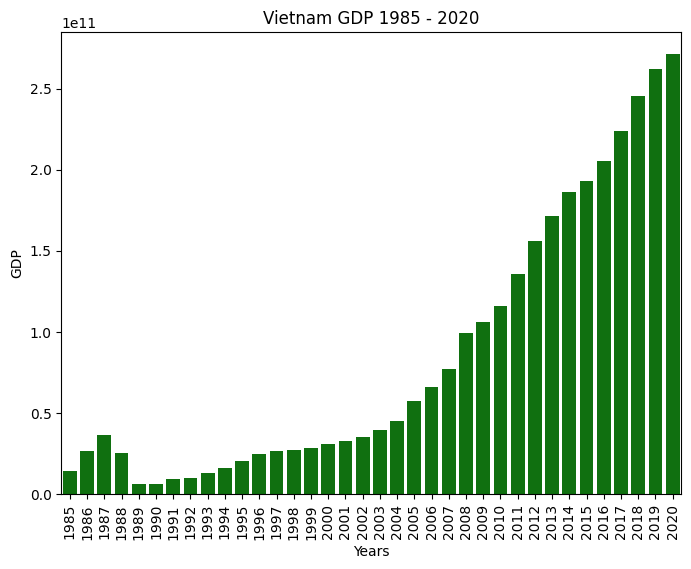

In [95]:
plt.figure(figsize = (8, 6))
sns.barplot(x = "year", y = "gdp", color= "green", data = vietnam_gdp)
plt.xticks(rotation = 90)

plt.title("Vietnam GDP 1985 - 2020")
plt.xlabel("Years")
plt.ylabel("GDP")

plt.show()

### IV. Linear Regression Model

In [81]:
x = vietnam_gdp[["year"]]
y = vietnam_gdp["gdp"]

In [82]:
# 20% of the data will be randomly selected to form the test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [83]:
# Create and fit the linear regression model
lrm_vietnam = LinearRegression()
lrm_vietnam.fit(x, y)

LinearRegression()

In [84]:
# Print Intercept and Coefficient
print("Intercept: ", lrm_vietnam.intercept_) 
print("Coefficient: ", lrm_vietnam.coef_) 

Intercept:  -14190487732983.729
Coefficient:  [7.12866819e+09]


In [85]:
gdp_model = lrm_vietnam.predict(x)

In [93]:
import warnings
warnings.filterwarnings("ignore")

years=[2021,2022,2023,2024,2025, 2026]
for year in years:
    vn_gdp_model = lrm_vietnam.predict([[year]])
    print(f"Predicted GDP for {year}: {vn_gdp_model}")

Predicted GDP for 2021: [2.16550681e+11]
Predicted GDP for 2022: [2.23679349e+11]
Predicted GDP for 2023: [2.30808017e+11]
Predicted GDP for 2024: [2.37936686e+11]
Predicted GDP for 2025: [2.45065354e+11]
Predicted GDP for 2026: [2.52194022e+11]


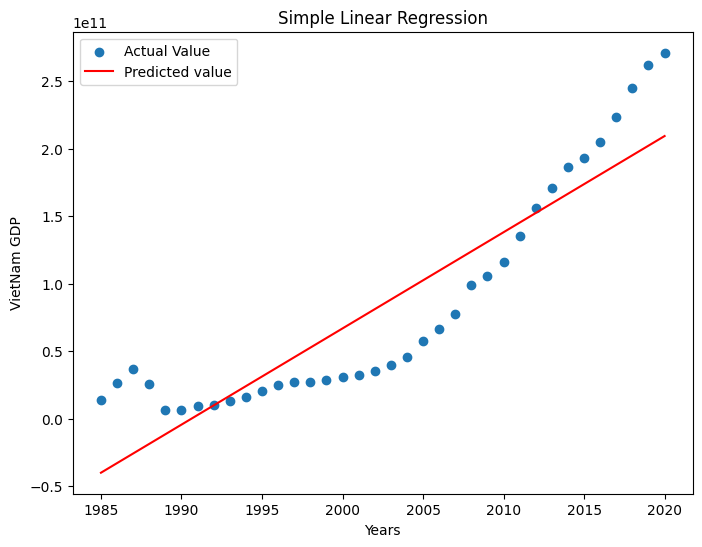

In [107]:
plt.figure(figsize = (8,6))
plt.scatter(x, y, label = "Actual Value")
plt.plot(x, gdp_model, color="red", label = "Predicted value")
plt.legend()

plt.title("Simple Linear Regression")
plt.xlabel("Years")
plt.ylabel("VietNam GDP")

plt.show()

### V. Logistic Regression Model

In [97]:
log_vn_model = LogisticRegression()
log_vn_model.fit(x,y)

LogisticRegression()

In [98]:
gdp_log_predic = log_vn_model.predict(x)

In [99]:
years=[2021,2022,2023,2024,2025, 2026]
for year in years:
    print(log_vn_model.predict([[year]]))
    
warnings.filterwarnings("ignore")

[271158442059]
[271158442059]
[271158442059]
[271158442059]
[271158442059]
[271158442059]


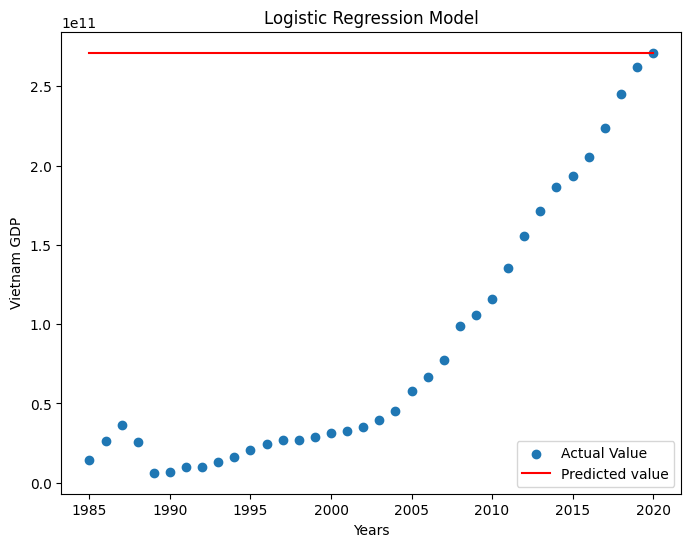

In [106]:
plt.figure(figsize = (8, 6))
plt.scatter(x, y, label = "Actual Value")
plt.plot(x, gdp_log_predic, color="red", label = "Predicted value")
plt.legend()


plt.title("Logistic Regression Model")
plt.xlabel("Years")
plt.ylabel("Vietnam GDP")

plt.show()

### Thanks for watching u^u